<a href="https://colab.research.google.com/github/A01749373/PortafolionImplementacionM2-Framework/blob/main/PortafolioImplementacionM2_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ariadna Jocelyn Guzman Jimenez A01749373

In [14]:
# Importación de liberias
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
# Eliminacion de datos NaN
df.dropna(axis = 0) # No hay

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
sex_dummy = pd.get_dummies(df['sex'])
smoker_dummy = pd.get_dummies(df['smoker'])
region_dummy = pd.get_dummies(df['region'])


df = pd.concat([df,sex_dummy,smoker_dummy,
                    region_dummy], axis=1)

df.rename(columns={'no': 'non-smoker',
              'yes': 'nicotian'}, inplace=True)

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   female      1338 non-null   uint8  
 8   male        1338 non-null   uint8  
 9   non-smoker  1338 non-null   uint8  
 10  nicotian    1338 non-null   uint8  
 11  northeast   1338 non-null   uint8  
 12  northwest   1338 non-null   uint8  
 13  southeast   1338 non-null   uint8  
 14  southwest   1338 non-null   uint8  
dtypes: float64(2), int64(2), object(3), uint8(8)
memory usage: 83.8+ KB


In [18]:
X = df[['age', 'bmi', 'children',
    'female','male','non-smoker',
    'nicotian','northeast','northwest',
    'southeast','southwest',]]

y = df['charges']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Intersection:",lr.intercept_)

Intersection: -497.5495224038841


In [21]:
print("Linear regression Training Accuracy:",lr.score(X_train, y_train))

Linear regression Training Accuracy: 0.7663071512473137


In [22]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,
columns=['Coefficient'])

print(coeff_df)

             Coefficient
age           257.468669
bmi           340.132644
children      558.158218
female        234.079512
male         -234.079512
non-smoker -12270.289907
nicotian    12270.289907
northeast     437.342318
northwest     106.726892
southeast    -322.357960
southwest    -221.711250


In [23]:
predictions = lr.predict(X_test)
print("Predicted medical costs values:", predictions)

Predicted medical costs values: [18148.34788059  8697.3315933  11365.92624657 35955.4151291
 12364.67935616 14256.40842786 28906.05818167 34018.22888934
  6754.96830292 11546.98818778  4167.47800052 10457.03407929
 32625.81647355  4393.33836767 11690.71921467 14114.47183861
 12109.44960409  1174.06280636 14397.68117674 35626.73075134
 31025.27583498 11247.65322183 30657.2724866   3650.01156578
  6539.12807669 13501.51605261 18208.64984812  4084.36645907
  5086.55417402 36589.60662916  8209.06193148 14982.58692504
 11026.46682315  5370.58786956 12711.77104967  8251.38923978
 10883.11900617  -795.36218499 11047.54870345  7901.52356584
 27849.03160915  5041.50688469   122.95817122 11451.54353622
  1331.14820443  8831.26048792  4655.24389657 24445.87133218
  7930.84489524  7519.26658501 38582.41801137 27272.1911695
  8549.33784359  9100.99300814 12954.48925247 37563.6815716
  -603.70166248  6583.89842022  8154.51244614 31051.87663874
 11649.3036537  11340.90773262 10787.95910809  5416.9051

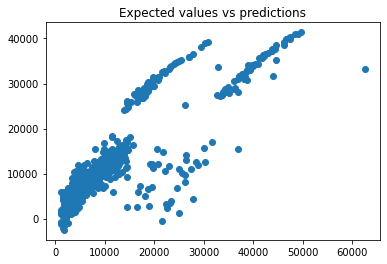

In [24]:
plt.scatter(y_test, predictions)
plt.title("Expected values vs predictions")
plt.show()